In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/DIC_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/data_transfer/Cropped/DIC_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of DIC

In [65]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [66]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [12]:
data_baseline_plot = data_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [13]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

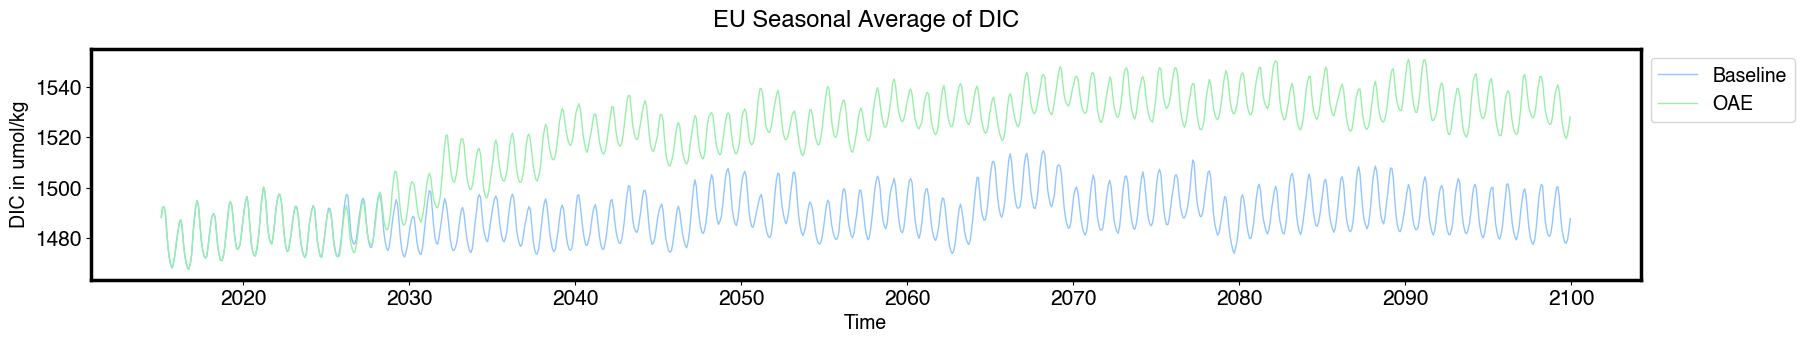

In [14]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [15]:
sliced_frame_baseline_plot = sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))

In [16]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

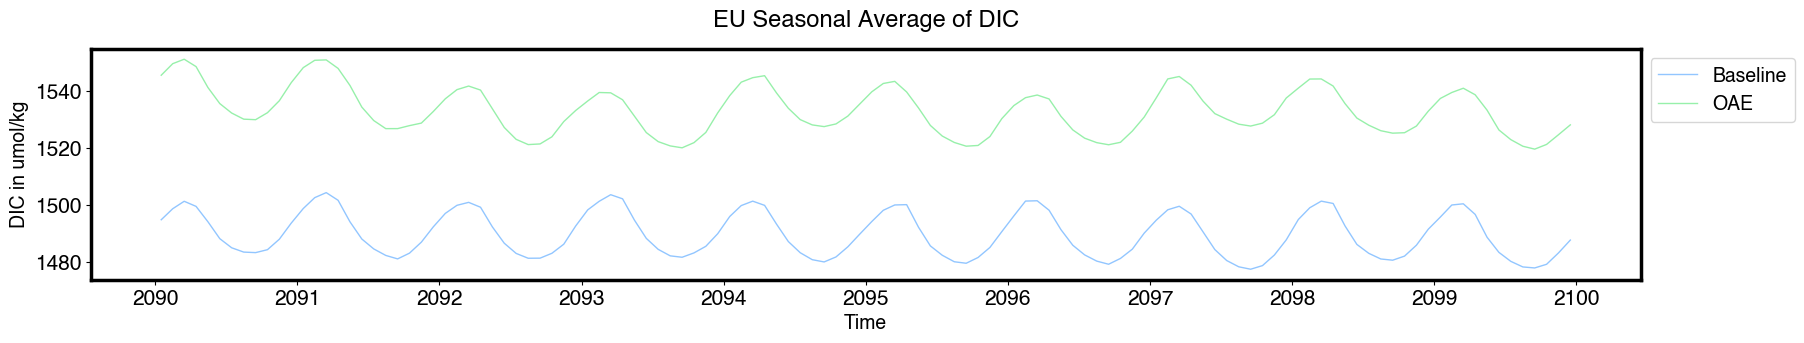

In [17]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of DIC', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of DIC

In [18]:
start_date = "2090-01-01"
end_date = "2100-01-01"

DIC_baseline = data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [23]:
DIC_season_summary_baseline = DIC_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
DIC_season_mean_all_years_baseline = DIC_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
DIC_seasonal_mean_baseline = DIC_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [24]:
start_date = "2090-01-01"
end_date = "2100-01-01"

DIC_oae = data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [25]:
DIC_season_summary_oae = DIC_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
DIC_season_mean_all_years_oae = DIC_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
DIC_seasonal_mean_oae = DIC_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

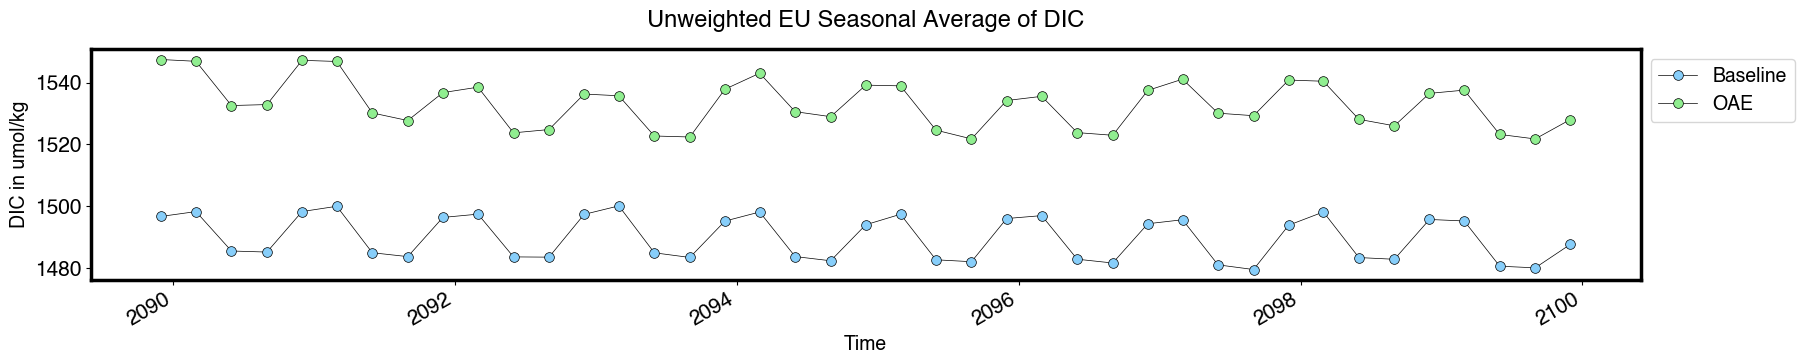

In [26]:
f, ax = plt.subplots(figsize=(20, 3))

DIC_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

DIC_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC

In [28]:
month_length_baseline = DIC_baseline.time_counter.dt.days_in_month
DIC_weighted_mean_baseline = ((DIC_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
DIC_weighted_mean_baseline = DIC_weighted_mean_baseline.where(DIC_weighted_mean_baseline)
DIC_weighted_season_baseline = DIC_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [30]:
month_length_oae = DIC_oae.time_counter.dt.days_in_month
DIC_weighted_mean_oae = ((DIC_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
DIC_weighted_mean_oae = DIC_weighted_mean_oae.where(DIC_weighted_mean_oae)
DIC_weighted_season_oae = DIC_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

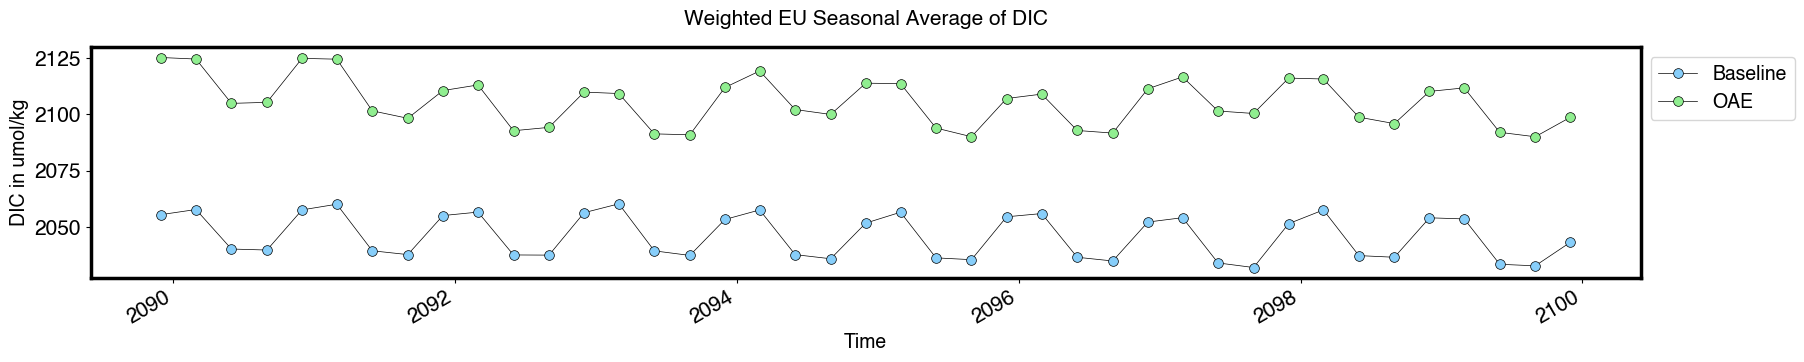

In [31]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
DIC_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

DIC_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=15, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC (seasons displayed)

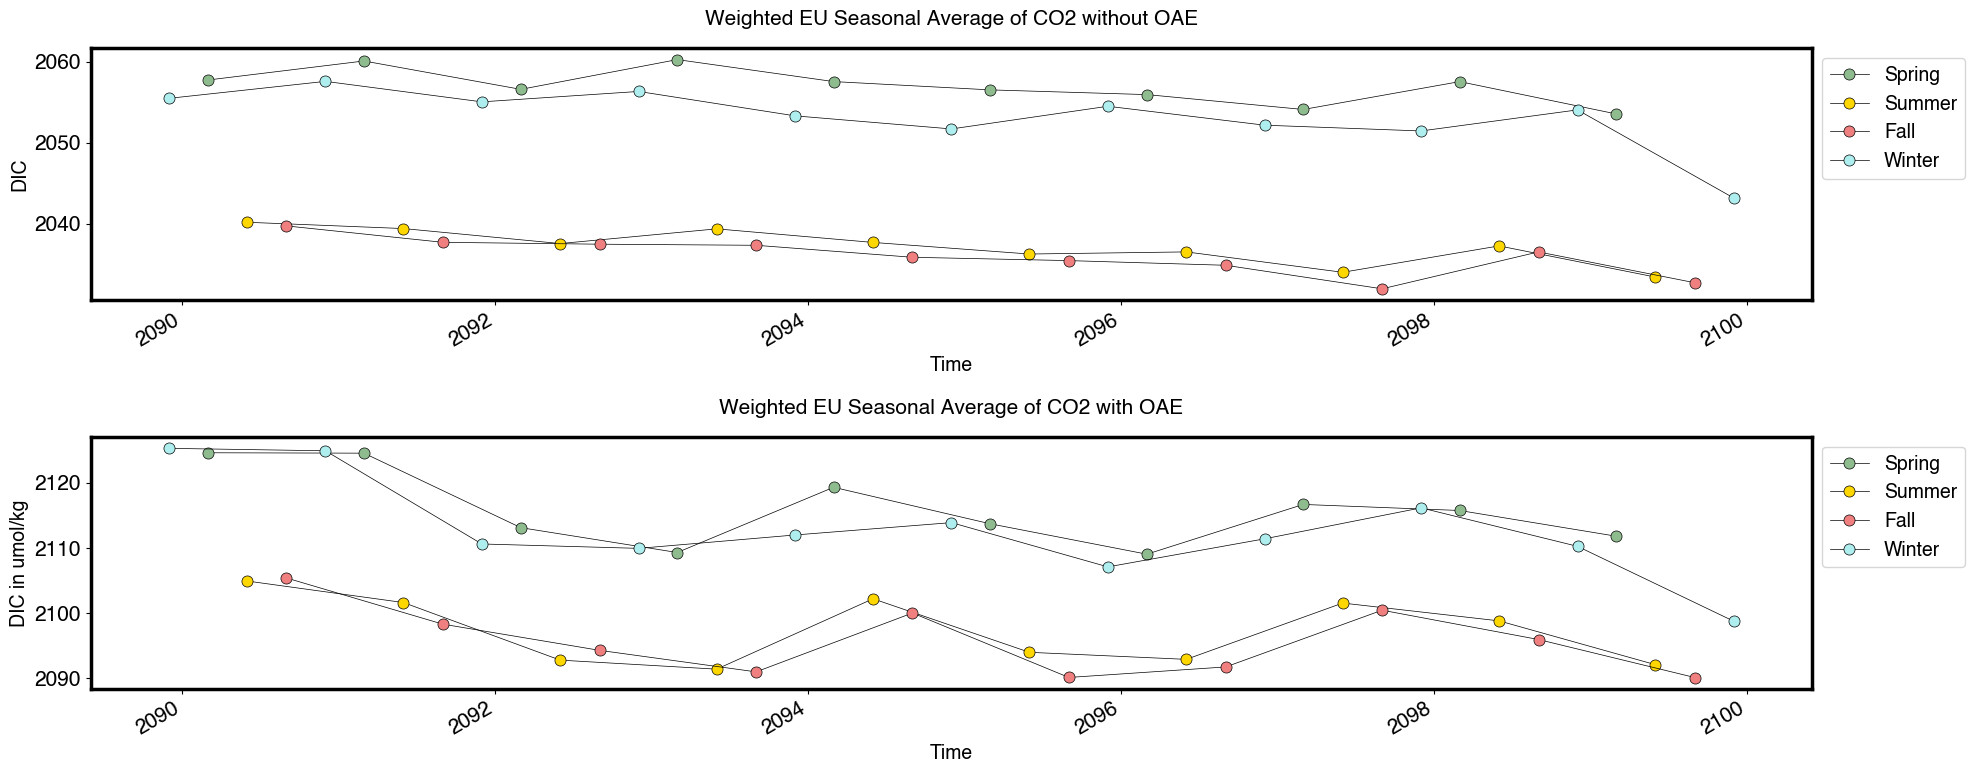

In [33]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in DIC_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC in umol/kg', fontsize=14)

for month, arr in DIC_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC in umol/kg', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of DIC without OAE (seasons displayed)

In [34]:
DIC_weighted_baseline = DIC_weighted_season_baseline.to_dataframe('DIC')
DIC_weighted_baseline['Month'] = pd.DatetimeIndex(DIC_weighted_baseline.index).month

In [35]:
conditions = [
    (DIC_weighted_baseline['Month'] == 3),
    (DIC_weighted_baseline['Month'] == 6),
    (DIC_weighted_baseline['Month'] == 9),
    (DIC_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

DIC_weighted_baseline['Month'] = np.select(conditions, values)

In [36]:
colors = dict(zip(DIC_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

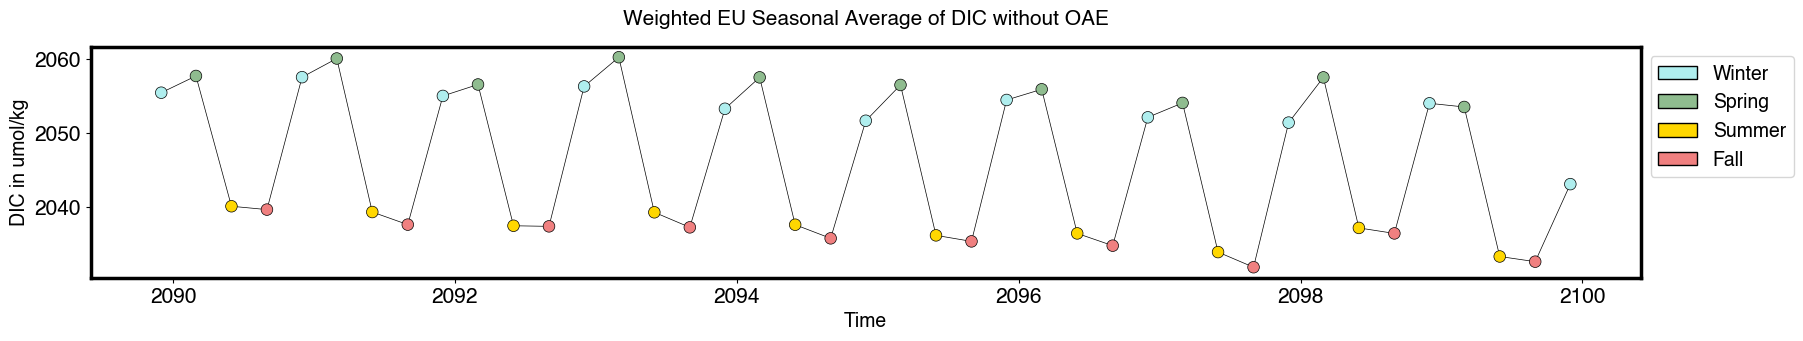

In [38]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(DIC_weighted_baseline.index, DIC_weighted_baseline.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_weighted_baseline.index, DIC_weighted_baseline.DIC, color=DIC_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of DIC with OAE (seasons displayed)

In [43]:
DIC_weighted_oae = DIC_weighted_season_oae.to_dataframe('DIC')
DIC_weighted_oae['Month'] = pd.DatetimeIndex(DIC_weighted_oae.index).month

In [44]:
conditions = [
    (DIC_weighted_oae['Month'] == 3),
    (DIC_weighted_oae['Month'] == 6),
    (DIC_weighted_oae['Month'] == 9),
    (DIC_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

DIC_weighted_oae['Month'] = np.select(conditions, values)

In [45]:
colors = dict(zip(DIC_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

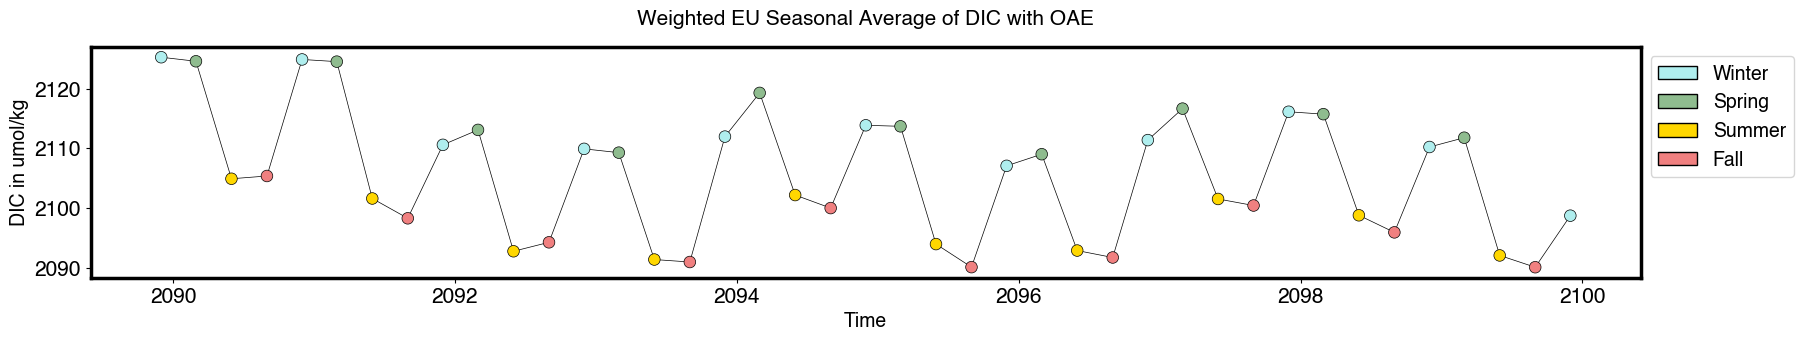

In [46]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(DIC_weighted_oae.index, DIC_weighted_oae.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_weighted_oae.index, DIC_weighted_oae.DIC, color=DIC_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontsize=15, y=1.06)

pass

### Weighted EU Seasonal Average of DIC (seasons displayed)

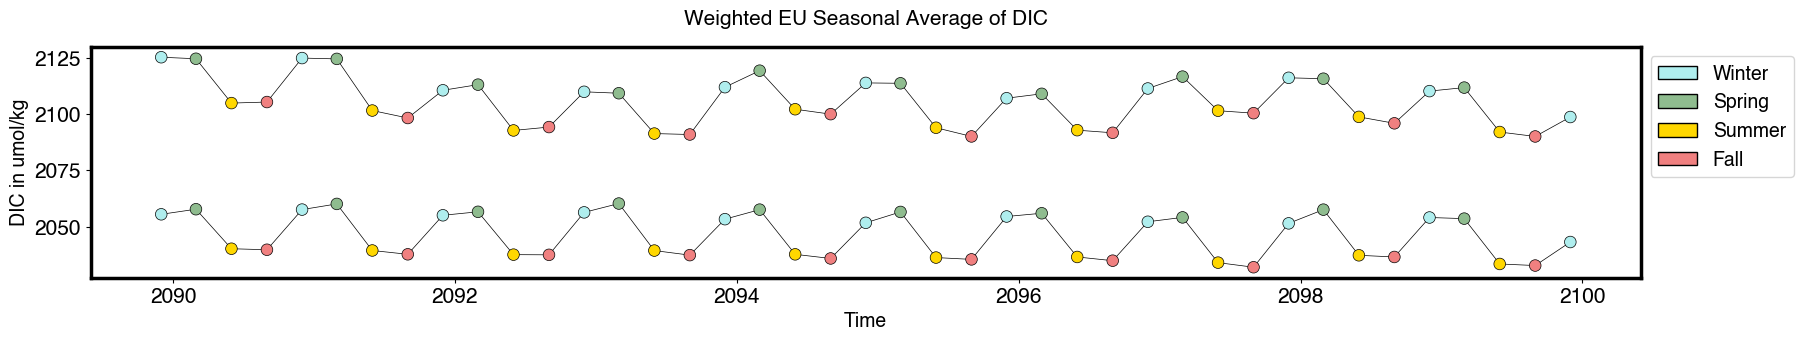

In [48]:
colors = dict(zip(DIC_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(DIC_weighted_baseline.index, DIC_weighted_baseline.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_weighted_baseline.index, DIC_weighted_baseline.DIC, color=DIC_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(DIC_weighted_oae.index, DIC_weighted_oae.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_weighted_oae.index, DIC_weighted_oae.DIC, color=DIC_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=15, y=1.06)

pass

### EU Monthly Averaged DIC for the last 10 years

In [50]:
mean_baseline = (sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).DIC.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [51]:
mean_oae = (sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).DIC.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

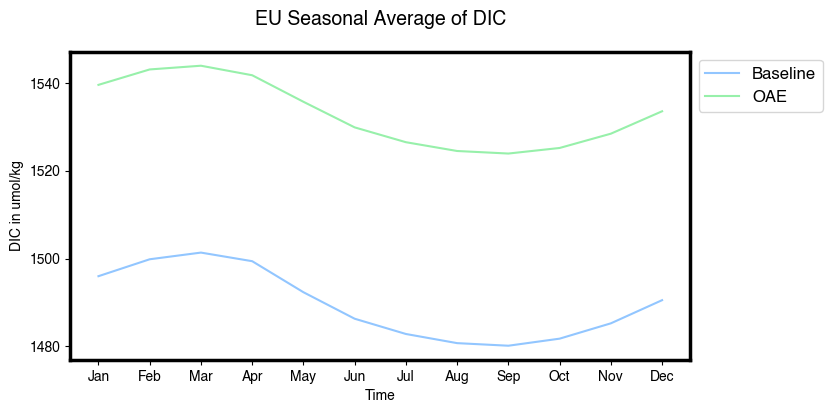

In [52]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.DIC, label='Baseline')
plt.plot(mean_oae.DIC, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("DIC in umol/kg", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of DIC', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of DIC from 2090 to 2100 without OAE

In [67]:
sliced_frame_baseline = sliced_frame_baseline.DIC.mean(dim=('deptht'))

In [68]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [69]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [70]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='DIC')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='DIC')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='DIC')

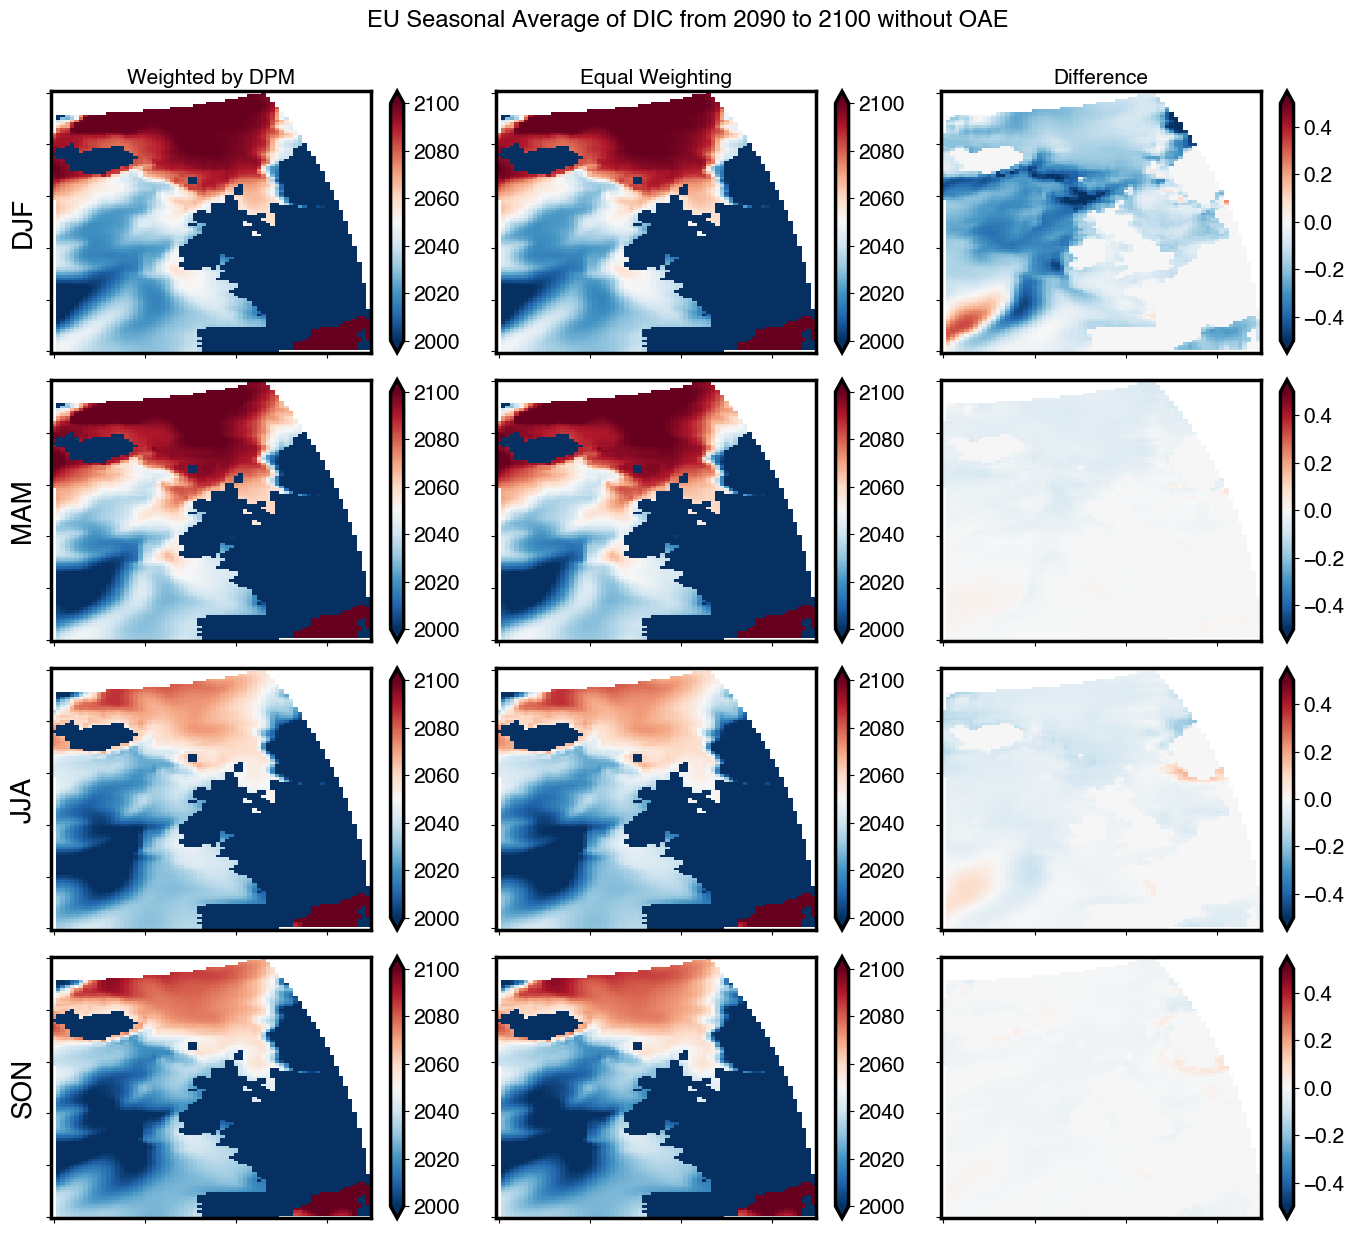

In [72]:
notnull = pd.notnull(ds_unweighted_baseline["DIC"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of DIC from 2090 to 2100 with OAE

In [73]:
sliced_frame_oae = sliced_frame_oae.DIC.mean(dim=('deptht'))

In [74]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [75]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [76]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='DIC')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='DIC')
ds_diff_oae = ds_diff_oae.to_dataset(name='DIC')

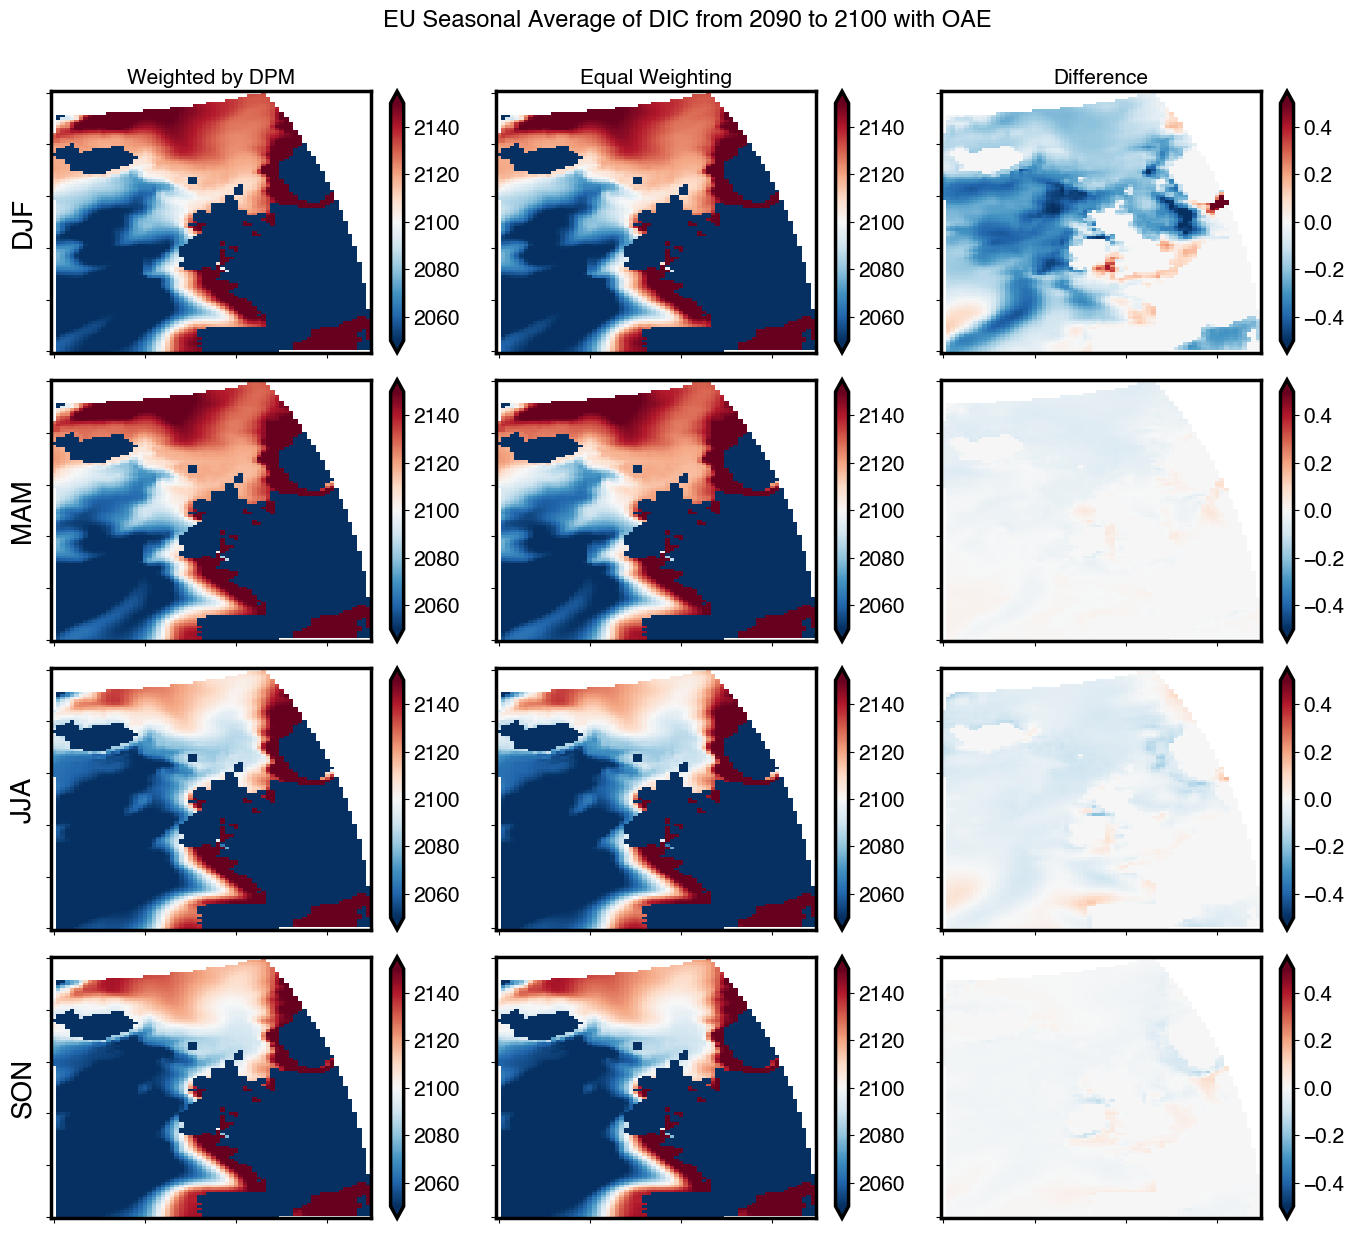

In [78]:
notnull = pd.notnull(ds_unweighted_baseline["DIC"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [79]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

DIC_baseline_month = data_baseline["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [84]:
DIC_month_summary_baseline = DIC_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
DIC_month_mean_all_years_baseline = DIC_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
DIC_monthly_mean_baseline = DIC_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [85]:
DIC_oae_month = data_oae["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [86]:
DIC_month_summary_oae = DIC_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
DIC_month_mean_all_years_oae = DIC_oae_month.resample(time_counter='M').mean(keep_attrs=True)
DIC_monthly_mean_oae = DIC_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

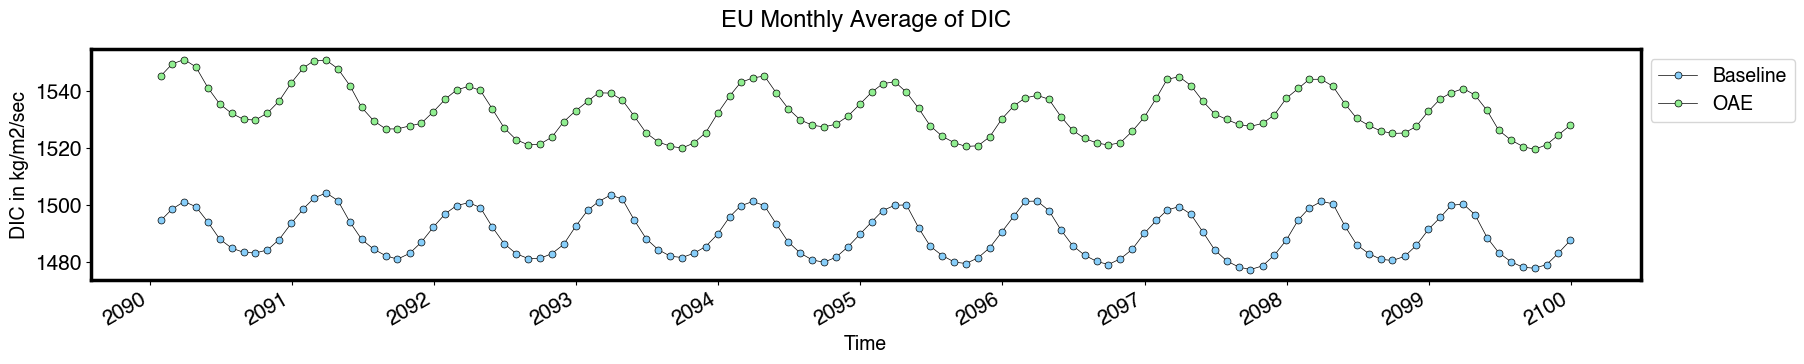

In [87]:
f, ax = plt.subplots(figsize=(20, 3))

DIC_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

DIC_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [88]:
DIC_baseline_monthly = DIC_monthly_mean_baseline.to_dataframe('DIC')
DIC_baseline_monthly['Month'] = pd.DatetimeIndex(DIC_baseline_monthly.index).month

In [89]:
conditions = [
    (DIC_baseline_monthly['Month'] == 1),
    (DIC_baseline_monthly['Month'] == 2),
    (DIC_baseline_monthly['Month'] == 3),
    (DIC_baseline_monthly['Month'] == 4),
    (DIC_baseline_monthly['Month'] == 5),
    (DIC_baseline_monthly['Month'] == 6),
    (DIC_baseline_monthly['Month'] == 7),
    (DIC_baseline_monthly['Month'] == 8),
    (DIC_baseline_monthly['Month'] == 9),
    (DIC_baseline_monthly['Month'] == 10),
    (DIC_baseline_monthly['Month'] == 11),
    (DIC_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

DIC_baseline_monthly['Month'] = np.select(conditions, values)

In [90]:
colors = dict(zip(DIC_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

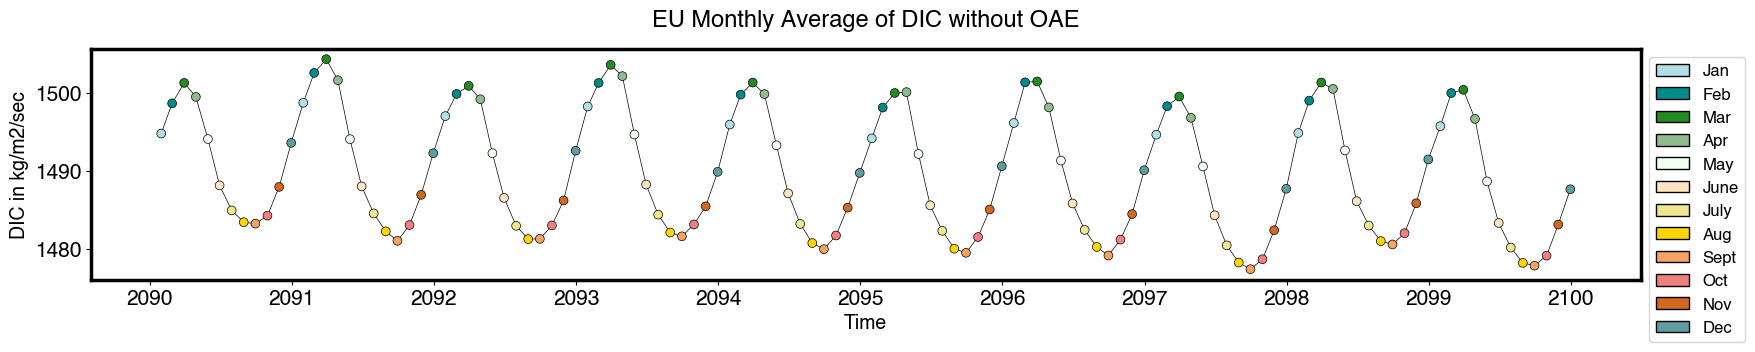

In [92]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(DIC_baseline_monthly.index, DIC_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_baseline_monthly.index, DIC_baseline_monthly.DIC, color=DIC_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC from 2090 to 2100 with OAE

In [93]:
DIC_oae_monthly = DIC_monthly_mean_oae.to_dataframe('DIC')
DIC_oae_monthly['Month'] = pd.DatetimeIndex(DIC_oae_monthly.index).month

In [94]:
conditions = [
    (DIC_oae_monthly['Month'] == 1),
    (DIC_oae_monthly['Month'] == 2),
    (DIC_oae_monthly['Month'] == 3),
    (DIC_oae_monthly['Month'] == 4),
    (DIC_oae_monthly['Month'] == 5),
    (DIC_oae_monthly['Month'] == 6),
    (DIC_oae_monthly['Month'] == 7),
    (DIC_oae_monthly['Month'] == 8),
    (DIC_oae_monthly['Month'] == 9),
    (DIC_oae_monthly['Month'] == 10),
    (DIC_oae_monthly['Month'] == 11),
    (DIC_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

DIC_oae_monthly['Month'] = np.select(conditions, values)

In [95]:
colors = dict(zip(DIC_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

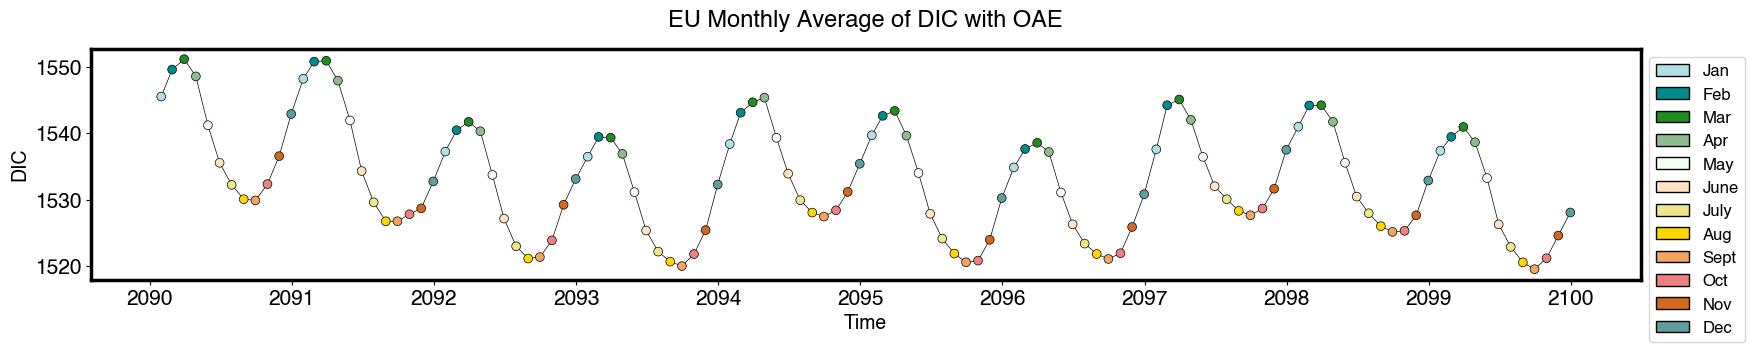

In [96]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(DIC_oae_monthly.index, DIC_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_oae_monthly.index, DIC_oae_monthly.DIC, color=DIC_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("EU Monthly Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC from 2090 to 2100 with and without OAE

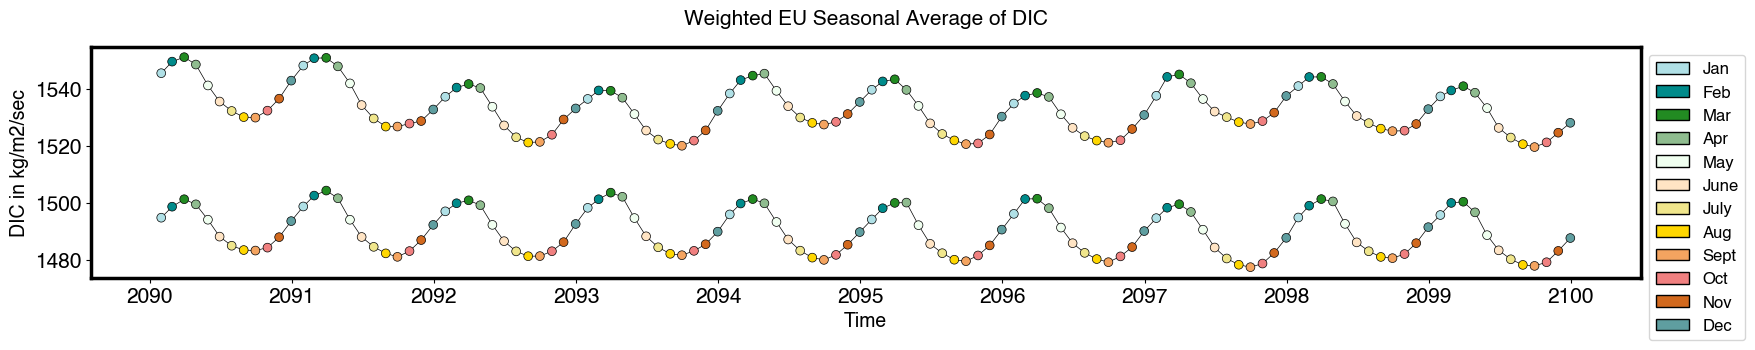

In [98]:
colors = dict(zip(DIC_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(DIC_baseline_monthly.index, DIC_baseline_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_baseline_monthly.index, DIC_baseline_monthly.DIC, color=DIC_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(DIC_oae_monthly.index, DIC_oae_monthly.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(DIC_oae_monthly.index, DIC_oae_monthly.DIC, color=DIC_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=15, y=1.06)

pass

### Δ DIC between Baseline and OAE from 2090 to 2100

In [99]:
delta_DIC = DIC_baseline_monthly.DIC - DIC_oae_monthly.DIC

In [100]:
delta_DIC = delta_DIC.to_xarray()

In [101]:
delta_DIC = delta_DIC.to_dataframe('DIC')
delta_DIC['Month'] = pd.DatetimeIndex(delta_DIC.index).month

In [102]:
conditions = [
    (delta_DIC['Month'] == 1),
    (delta_DIC['Month'] == 2),
    (delta_DIC['Month'] == 3),
    (delta_DIC['Month'] == 4),
    (delta_DIC['Month'] == 5),
    (delta_DIC['Month'] == 6),
    (delta_DIC['Month'] == 7),
    (delta_DIC['Month'] == 8),
    (delta_DIC['Month'] == 9),
    (delta_DIC['Month'] == 10),
    (delta_DIC['Month'] == 11),
    (delta_DIC['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_DIC['Month'] = np.select(conditions, values)

In [103]:
colors = dict(zip(delta_DIC.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

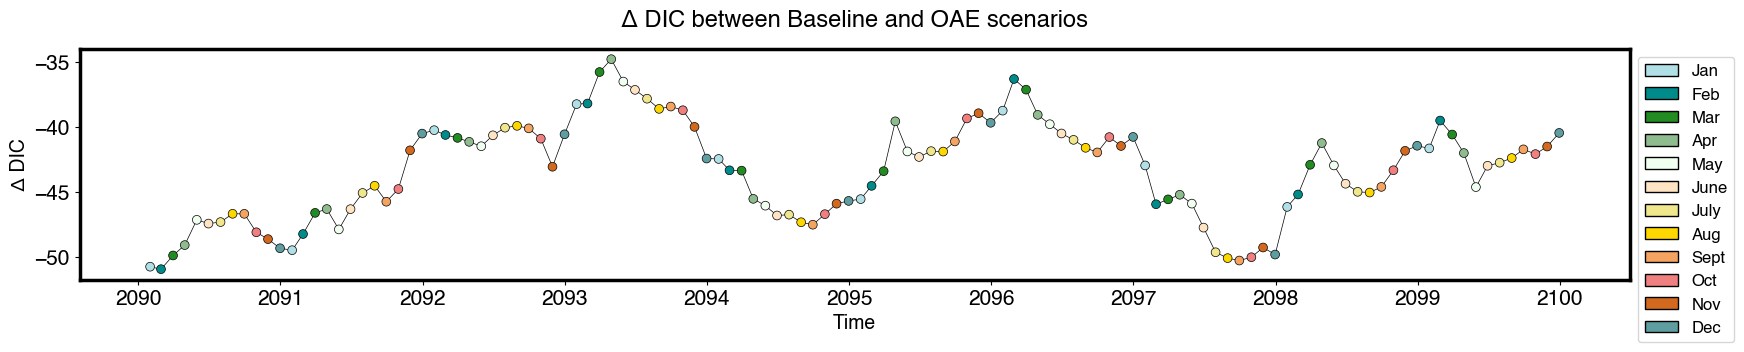

In [104]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_DIC.index, delta_DIC.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_DIC.index, delta_DIC.DIC, color=delta_DIC.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC', fontsize=14)
ax.set_title("Δ DIC between Baseline and OAE scenarios", fontname="Helvetica", fontsize=17, y=1.06)

pass

### DIC Annual Amplitude without OAE

In [105]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [106]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['DIC'].idxmax().values]

In [107]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['DIC'].idxmin().values]

In [108]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [109]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [110]:
DIC_amplitude_baseline = year_max_baseline['DIC'] - year_min_baseline['DIC']

In [111]:
DIC_amplitude_baseline = DIC_amplitude_baseline.to_xarray()

In [112]:
DIC_amplitude_baseline = DIC_amplitude_baseline.to_dataset()

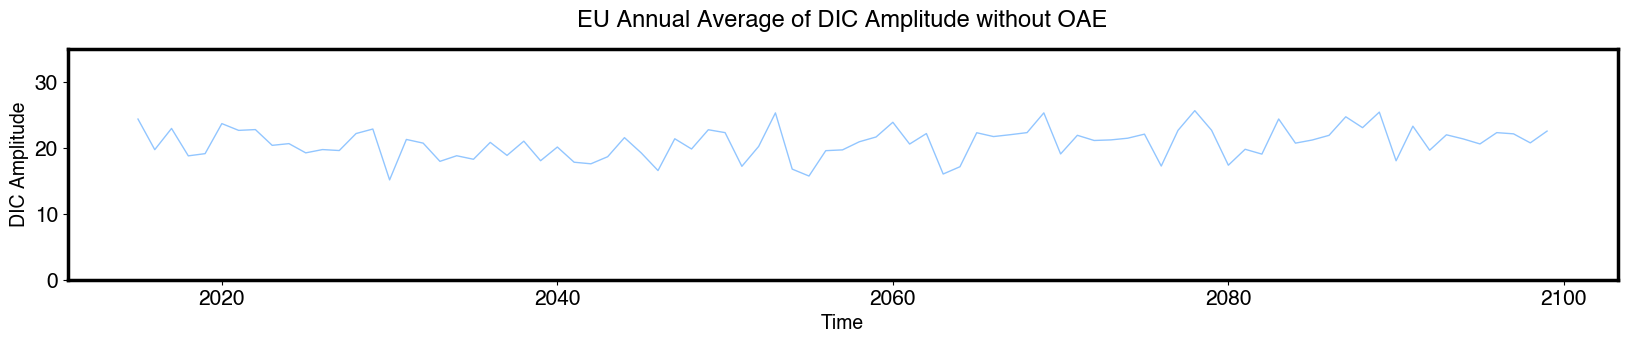

In [124]:
plt.figure(figsize=(20, 3))
plt.plot(DIC_amplitude_baseline.year, DIC_amplitude_baseline.DIC, linewidth=1)
plt.ylim(0, 35)
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC Amplitude", fontsize=14)
plt.title('EU Annual Average of DIC Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### DIC Annual Amplitude with OAE

In [125]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [126]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['DIC'].idxmax().values]

In [127]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['DIC'].idxmin().values]

In [128]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [118]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [119]:
DIC_amplitude_oae = year_max_oae['DIC'] - year_min_oae['DIC']

In [120]:
DIC_amplitude_oae = DIC_amplitude_oae.to_xarray()

In [121]:
DIC_amplitude_oae = DIC_amplitude_oae.to_dataset()

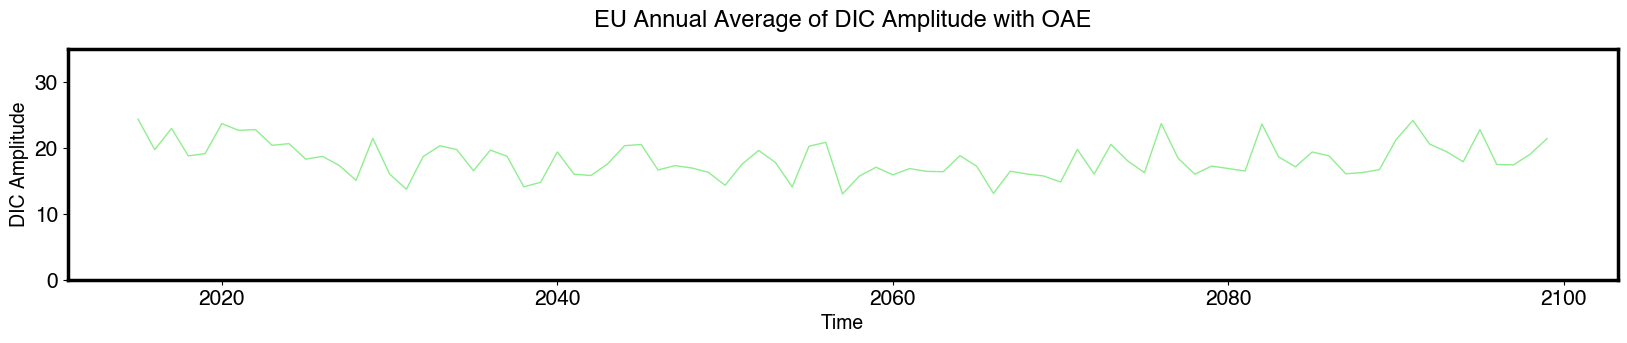

In [129]:
plt.figure(figsize=(20, 3))
plt.plot(DIC_amplitude_oae.year, DIC_amplitude_oae.DIC, linewidth=1, color='lightgreen')
plt.ylim(0, 35)
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC Amplitude", fontsize=14)
plt.title('EU Annual Average of DIC Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### DIC Annual Amplitude with and without OAE

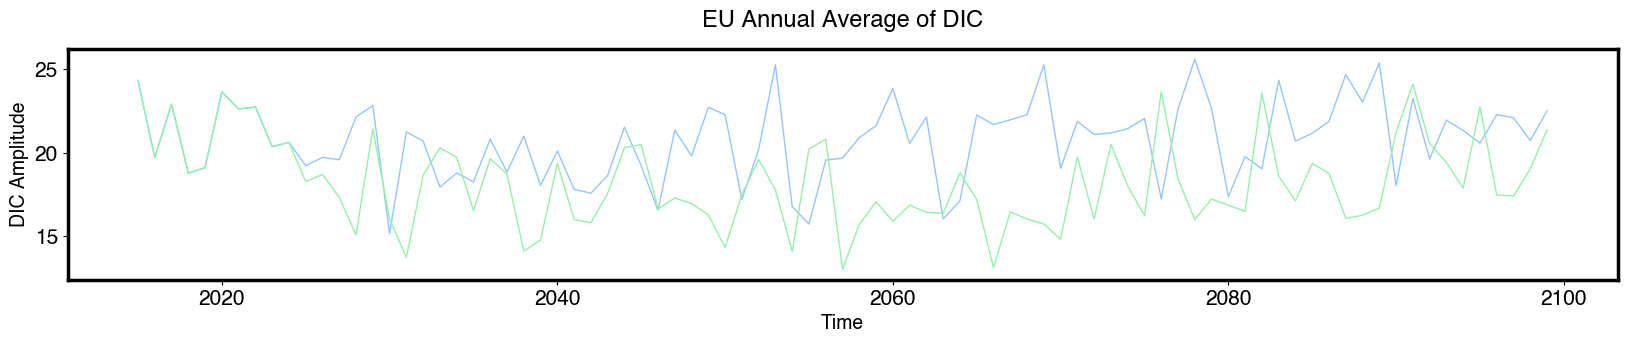

In [130]:
plt.figure(figsize=(20, 3))
plt.plot(DIC_amplitude_baseline.year, DIC_amplitude_baseline.DIC, linewidth=1, label = 'Baseline')
plt.plot(DIC_amplitude_oae.year, DIC_amplitude_oae.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC Amplitude", fontsize=14)
plt.title('EU Annual Average of DIC', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [131]:
DIC_amplitude_baseline_pct = DIC_amplitude_baseline.to_dataframe()
DIC_amplitude_oae_pct = DIC_amplitude_oae.to_dataframe()

In [132]:
DIC_amplitude_baseline_pct = DIC_amplitude_baseline_pct.pct_change()
DIC_amplitude_oae_pct = DIC_amplitude_oae_pct.pct_change()

In [133]:
DIC_amplitude_baseline_pct = DIC_amplitude_baseline_pct.to_xarray()
DIC_amplitude_oae_pct = DIC_amplitude_oae_pct.to_xarray()

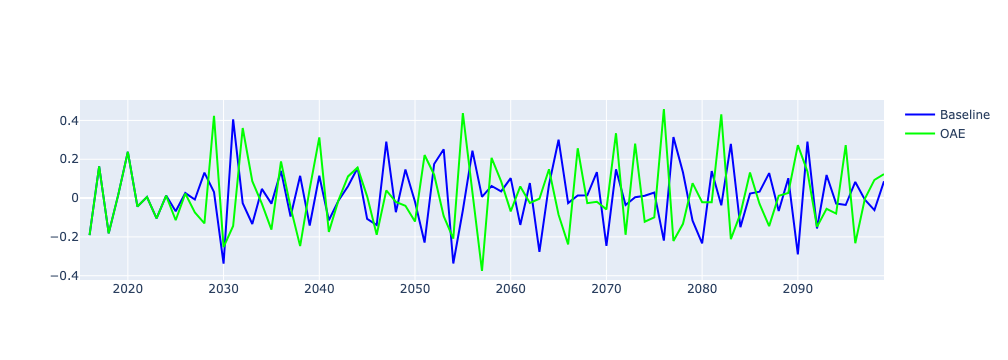

In [134]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=DIC_amplitude_baseline_pct.year, y=DIC_amplitude_baseline_pct['DIC'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=DIC_amplitude_oae_pct.year, y=DIC_amplitude_oae_pct['DIC'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()